# K means

## <span style="color:blue">Alunos</span>

<ul>
    <li>Diego Santos Gonçalves - 20183012537</li>
    <li>Mariana Bulgarelli Alves dos Santos - 20183000330</li>
</ul>


In [28]:
#imports
import scipy.io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from scipy import misc
from tqdm import tqdm
%matplotlib inline
import numpy as np


___________________________________________________________________
## Exercício 1
a) Executar o algoritmo K-means para obter 3 clusters das amostras presentes no arquivo “data2.mat”

In [2]:
path = 'Data/data2.mat'
data2_mat = scipy.io.loadmat(path)
X2 = data2_mat['X']
random_state = 120

data2_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.243

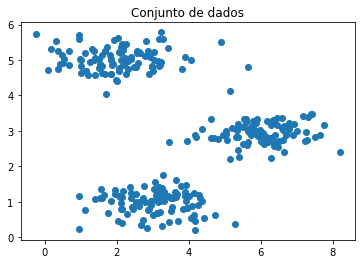

In [3]:
x = [x[0] for x in X2]
y = [x[1] for x in X2]

plt.scatter(x=x, y=y)
plt.title('Conjunto de dados')
plt.show()
plt.close()

In [4]:
def plot_kmeans(X, kmeans, center_by_iter = 0):
    arr_labels = kmeans.predict(X)
    x = [x[0] for x in X]
    y = [x[1] for x in X]
    labels = np.unique(arr_labels)
    
    cluster_centers = kmeans.cluster_centers_

    for i in labels:
        plt.scatter(np.array(x)[arr_labels == i], np.array(y)[arr_labels == i], label=i, marker='.')

    if(center_by_iter == 0):
        for cluster_center in cluster_centers:
            plt.scatter(cluster_center[0], cluster_center[1], color='black', marker='x')
    else:
        for i in range(kmeans.n_clusters):
            center = [c[i] for c in centers_by_iter]
            center_x = [x[0] for x in center]
            center_y = [x[1] for x in center]
            plt.plot(center_x,center_y, color='black')
            plt.scatter(center_x, center_y, color='black', marker='x') 
    
    plt.title(f'Kmeans algoritmo para {kmeans.n_clusters} clusters - Numero de iterações {kmeans.n_iter_}')
    plt.legend()
    plt.show()
    plt.close()
    

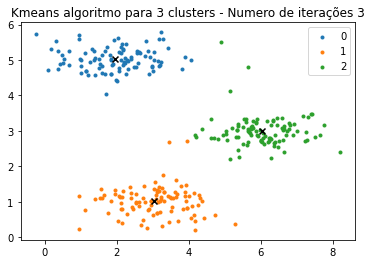

In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=random_state )

kmeans.fit(X2)
plot_kmeans(X2, kmeans)


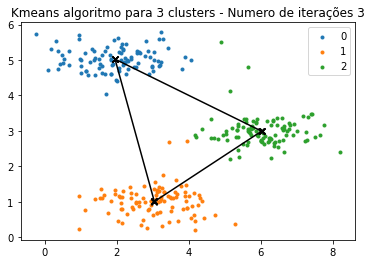

In [6]:
n_iter = 1
centers_by_iter = []
while True:
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=random_state, max_iter = n_iter)
    kmeans.fit(X2)
    centers_by_iter.append(kmeans.cluster_centers_)
    if(kmeans.n_iter_ < n_iter):
        break
    n_iter += 1

plot_kmeans(X2, kmeans, centers_by_iter)
    


b) Agora ajuste o algoritmo K-Means para diferentes números de clusters (1 a 20).


In [7]:
def kmeans_cluster(n_cluster, X):
    kmeans = KMeans(n_clusters=n_cluster, init='k-means++')
    kmeans.fit(X)
    return kmeans


c) Para cada modelo, armazene o número de clusters e o valor da inércia(custo).


  0%|          | 0/20 [00:00<?, ?it/s]

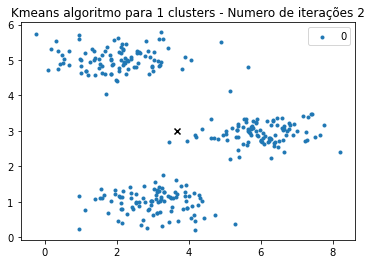

  5%|▌         | 1/20 [00:00<00:11,  1.70it/s]

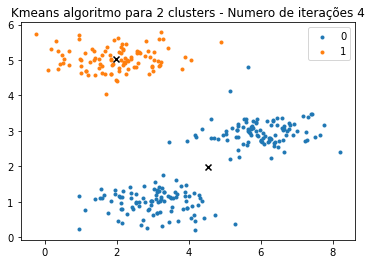

 10%|█         | 2/20 [00:00<00:08,  2.07it/s]

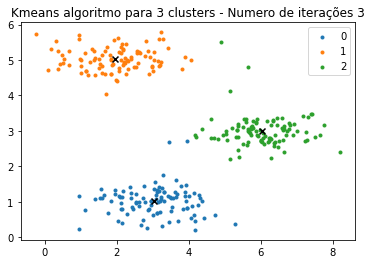

 15%|█▌        | 3/20 [00:01<00:06,  2.46it/s]

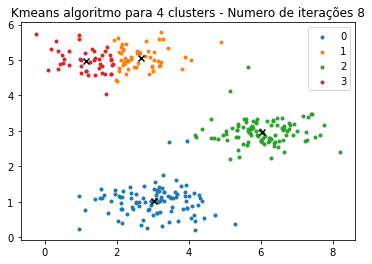

 20%|██        | 4/20 [00:01<00:05,  2.75it/s]

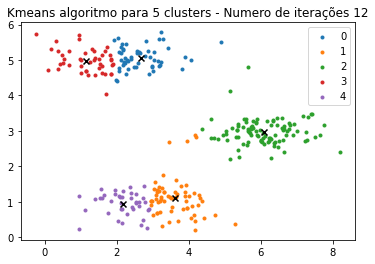

 25%|██▌       | 5/20 [00:01<00:05,  2.97it/s]

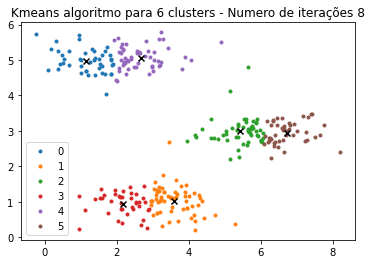

 30%|███       | 6/20 [00:01<00:04,  3.10it/s]

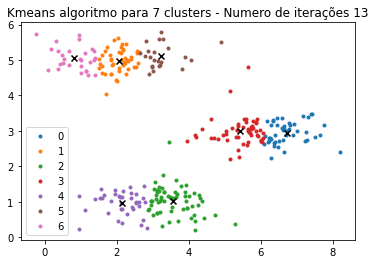

 35%|███▌      | 7/20 [00:02<00:03,  3.36it/s]

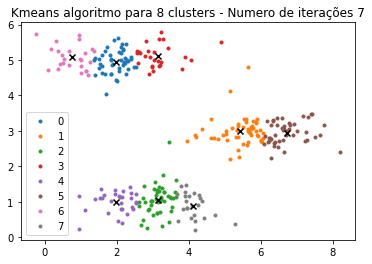

 40%|████      | 8/20 [00:02<00:03,  3.55it/s]

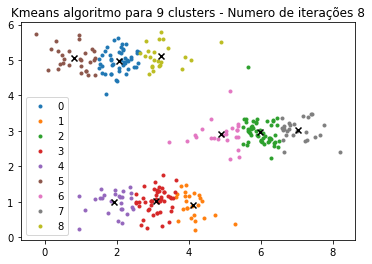

 45%|████▌     | 9/20 [00:02<00:03,  3.45it/s]

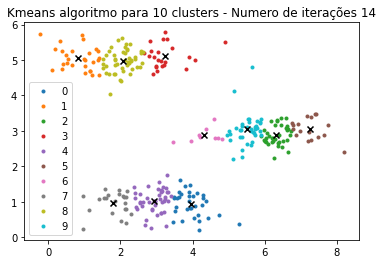

 50%|█████     | 10/20 [00:03<00:03,  3.30it/s]

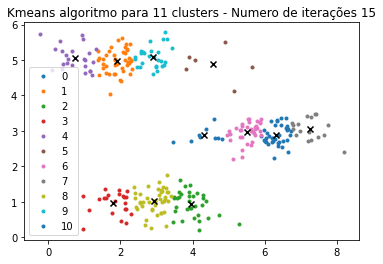

 55%|█████▌    | 11/20 [00:03<00:02,  3.08it/s]

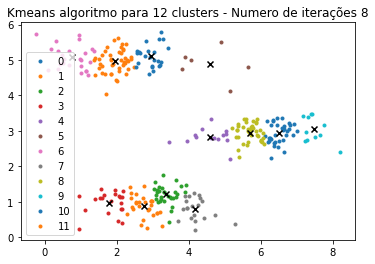

 60%|██████    | 12/20 [00:03<00:02,  2.99it/s]

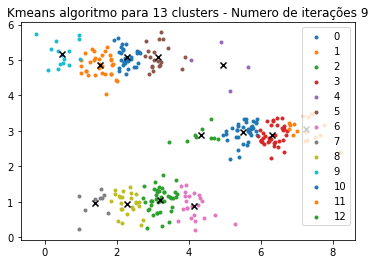

 65%|██████▌   | 13/20 [00:04<00:02,  2.98it/s]

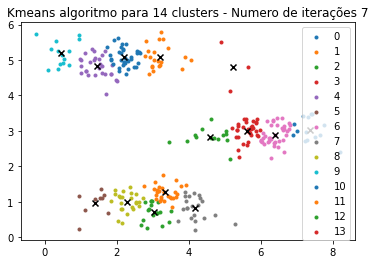

 70%|███████   | 14/20 [00:04<00:02,  2.96it/s]

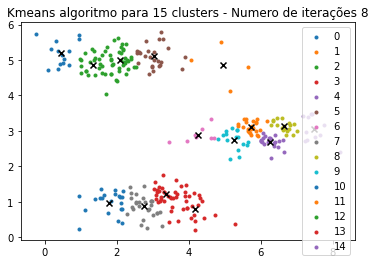

 75%|███████▌  | 15/20 [00:04<00:01,  2.91it/s]

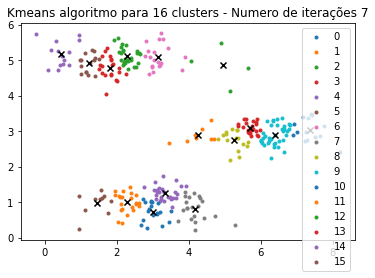

 80%|████████  | 16/20 [00:05<00:01,  2.70it/s]

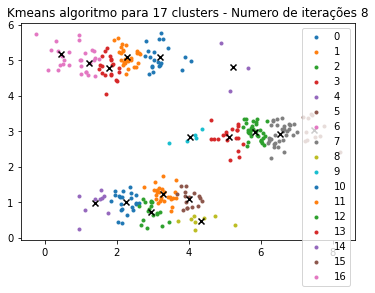

 85%|████████▌ | 17/20 [00:05<00:01,  2.59it/s]

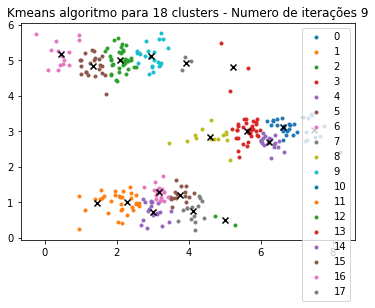

 90%|█████████ | 18/20 [00:06<00:00,  2.48it/s]

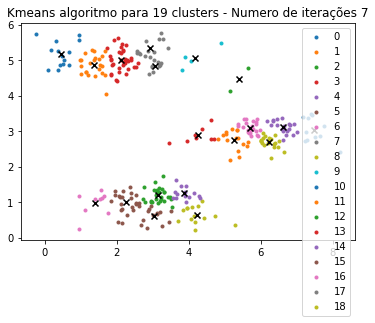

 95%|█████████▌| 19/20 [00:06<00:00,  2.39it/s]

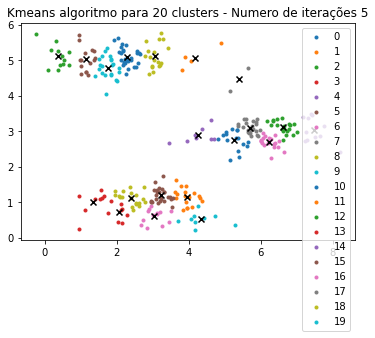

100%|██████████| 20/20 [00:06<00:00,  2.87it/s]


In [8]:
inertias = []
n_clusters = []
for i in tqdm(range(1,21)):
    kmeans = kmeans_cluster(i, X2)
    inertias.append(kmeans.inertia_)
    n_clusters.append(kmeans.n_clusters)
    plot_kmeans(X2, kmeans)


In [9]:
inertias

[1957.6547206251664,
 913.3192714747096,
 266.65851965491936,
 211.4822252014237,
 161.10916957790545,
 120.76337561233976,
 102.46214580002027,
 88.67883315070625,
 76.22247989567715,
 68.9288474760548,
 62.20660240507138,
 56.722057121516244,
 51.47145128558544,
 47.21708121675918,
 45.1132502294967,
 41.96223922977914,
 39.56036005265623,
 38.26085718028407,
 35.34660023741246,
 33.25915417505621]

d) Plote a Inércia (custo) versus Nº de clusters. Parece haver um número ideal de cluster (método do cotovelo - elbow?

<ipython-input-10-bdf8109ee5c1>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


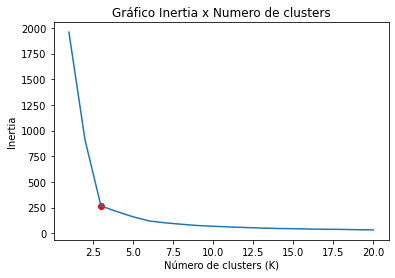

In [10]:
plt.plot(n_clusters, inertias)
plt.scatter(3,inertias[2], color='red', label=f"Ponto de inflexão (3, {inertias[2]})")
plt.title('Gráfico Inertia x Numero de clusters')
ax = plt.axes()
ax.set_xlabel('Número de clusters (K)')
ax.set_ylabel('Inertia')
plt.show()
plt.close()

e) Ajuste um modelo de agrupamento aglomerativo hierárquico (Hierarchical Agglomerative Clustering) com três clusters (escolha e teste diferentes tipos de linkage).

In [11]:
def aggCluster(X, n_clusters, affinity, linkage):    
    agg = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
    y = agg.fit_predict(X)
    return (y,agg)

In [12]:
def plot_aggCluster(X,  y_label, agg, link):
    x = [x[0] for x in X]
    y = [x[1] for x in X]
    
    plt.scatter(x,y, c=y_label,  marker='.') 
    
    plt.title(f'Cluster aglomerativo hierarquico algoritmo para {agg.n_clusters} clusters - {link}')
    plt.show()
    plt.close()

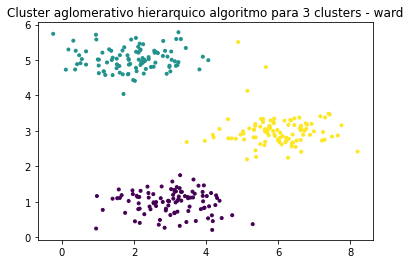

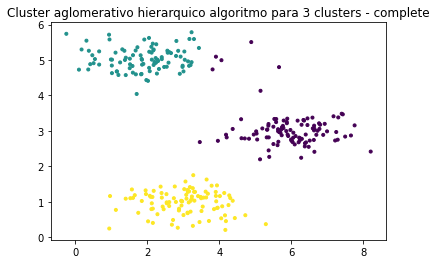

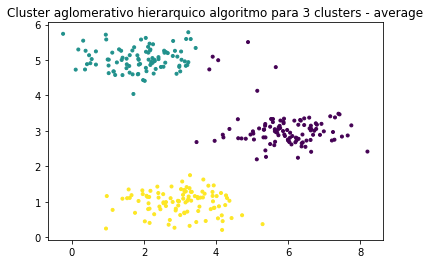

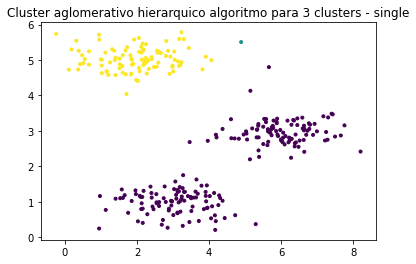

In [13]:
linkages = ["ward", "complete", "average", "single"]
for link in linkages:
    y_label, agg = aggCluster(X2, 3, 'euclidean', link)
    plot_aggCluster(X2, y_label, agg, link)

f) Compare os resultados com os obtidos pelo k-means

Gráfico gerado pelo K-means algoritimo


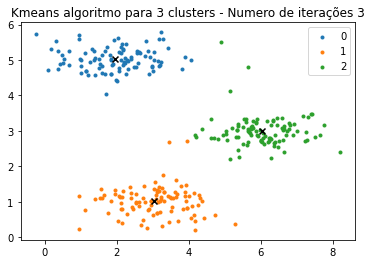

Inertia  266.65851965491936

Gráficos gerados pelo Algoritmo do clustering Aglomerativo Hierárquico


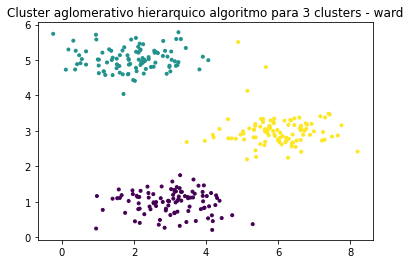

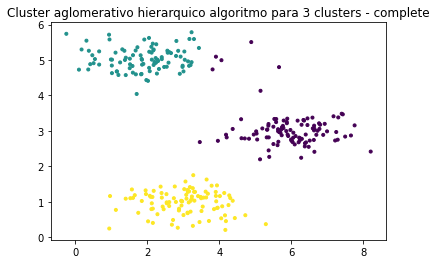

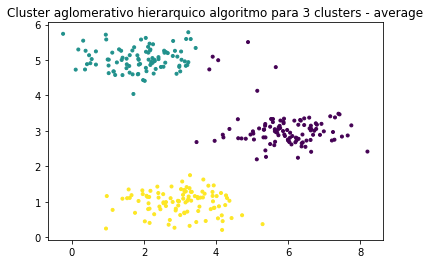

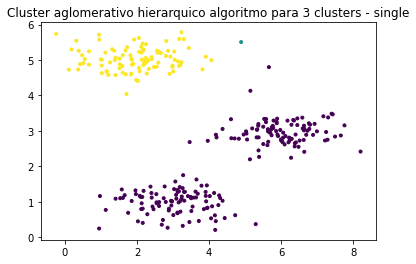

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=random_state )

kmeans.fit(X2)
print('Gráfico gerado pelo K-means algoritimo')
plot_kmeans(X2, kmeans)
print('Inertia ',kmeans.inertia_)

print('')

print('Gráficos gerados pelo Algoritmo do clustering Aglomerativo Hierárquico')
for link in linkages:
    y_label, agg = aggCluster(X2, 3, 'euclidean', link)
    plot_aggCluster(X2, y_label, agg, link)


g) Visualize o dendrograma produzido pelo método de agrupamento aglomerativo Dica: O SciPy tem um módulo chamado cluster.hierarchy que contém as funções de linkage e dendrogram necessárias para criar o mapa de ligação (linkage) e traçar o dendrograma resultante.


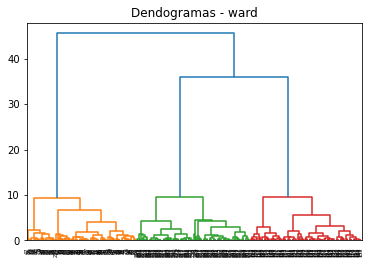

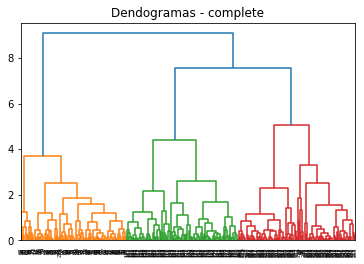

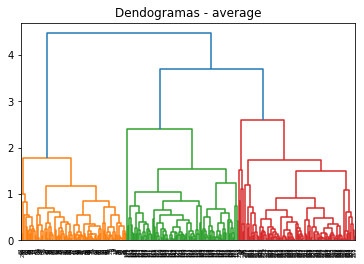

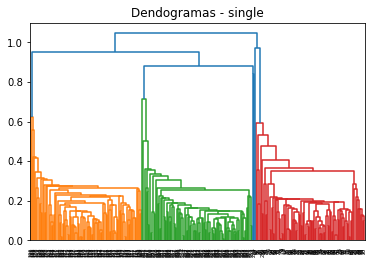

In [15]:
for link in linkages:
    plt.title(f'Dendogramas - {link}')
    dend = shc.dendrogram(shc.linkage(X2, method=link))
    plt.show()
    plt.close()

___________________________________________________________________
## Exercício 2

In [16]:
path = 'Data/bird_small.mat'
img_data = scipy.io.loadmat(path)
A = img_data['A']
A = np.reshape(A, (len(A)*len(A),3))
A

array([[219, 180, 103],
       [230, 185, 116],
       [226, 186, 110],
       ...,
       [ 65,  43,  39],
       [ 58,  37,  38],
       [ 52,  39,  34]], dtype=uint8)

In [17]:
A = A/255
A

array([[0.85882353, 0.70588235, 0.40392157],
       [0.90196078, 0.7254902 , 0.45490196],
       [0.88627451, 0.72941176, 0.43137255],
       ...,
       [0.25490196, 0.16862745, 0.15294118],
       [0.22745098, 0.14509804, 0.14901961],
       [0.20392157, 0.15294118, 0.13333333]])

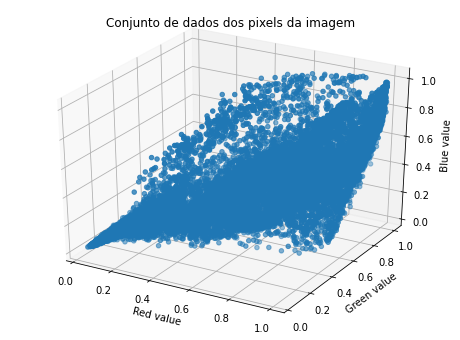

In [18]:
x = [x[0] for x in A]
y = [x[1] for x in A]
z = [x[2] for x in A]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z, marker='o')
ax.set_xlabel('Red value')
ax.set_ylabel('Green value')
ax.set_zlabel('Blue value')
plt.title('Conjunto de dados dos pixels da imagem')
plt.show()
plt.close()

In [47]:
kmeans = KMeans(n_clusters=16, init='k-means++', random_state=random_state )

arr_label = kmeans.fit_predict(A)
clusters_center_colors = kmeans.cluster_centers_

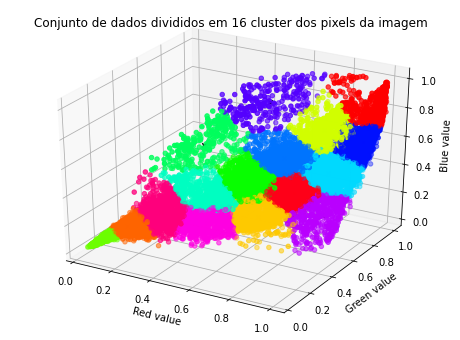

In [48]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z, marker='o', c=arr_label, cmap='hsv')
for cluster in clusters_center_colors:
    ax.scatter(cluster[0], cluster[1], cluster[2], marker='x', color='black')

ax.set_xlabel('Red value')
ax.set_ylabel('Green value')
ax.set_zlabel('Blue value')
plt.title('Conjunto de dados divididos em 16 cluster dos pixels da imagem')
plt.show()
plt.close()

In [49]:
clusterImgData = [clusters_center_colors[i] for i in arr_label]
clusterImgData = np.array(clusterImgData)
compressImgData = np.reshape(clusterImgData, (128,128,3))

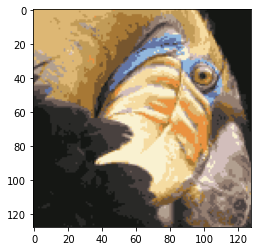

In [50]:
plt.imshow(compressImgData)
plt.show()
plt.imsave('./Bird_small_compress_image.png',arr=compressImgData)
plt.close()